In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
# import the libraries
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import pandas as pd

from pathlib import Path

In [3]:
DATA_DIR = "../data/MNIST_CSV"

TRAIN_CSV = Path(DATA_DIR) / "mnist_train.csv"
TEST_CSV = Path(DATA_DIR) / "mnist_test.csv"

In [4]:
df_test = pd.read_csv(TEST_CSV, header=None)
df_train = pd.read_csv(TRAIN_CSV, header=None)

In [5]:
data_test = df_test.iloc[:, 1:].to_numpy()
labels_test = df_test.iloc[:, 0].to_numpy()

data_tr = df_train.iloc[:, 1:].to_numpy()
labels_tr = df_train.iloc[:, 0].to_numpy()

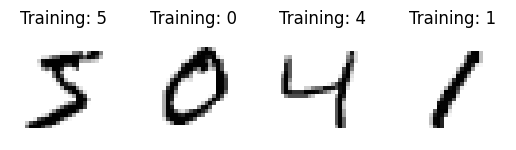

In [6]:
for i in range(4):
    plt.subplot(2, 4, i + 1)
    plt.axis('off')
    plt.imshow(data_tr[i, :].reshape((28, 28)), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % labels_tr[i])

In [7]:
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(data_tr, labels_tr, test_size=0.2)
print('Training data and target sizes: \n{}, {}'.format(X_tr.shape, y_tr.shape))
print('Test data and target sizes: \n{}, {}'.format(X_val.shape, y_val.shape))

Training data and target sizes: 
(48000, 784), (48000,)
Test data and target sizes: 
(12000, 784), (12000,)


The first classifier will be the **[Decision tree](https://en.wikipedia.org/wiki/Decision_tree)**


In [8]:
from sklearn import tree
class_tree=tree.DecisionTreeClassifier()
class_tree.fit(X_tr, y_tr)

DecisionTreeClassifier()

Let's see the accuracy of our classifier.

In [9]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = class_tree.predict(X_val)
print("Accuracy of model = %2f%%" % (accuracy_score(y_val, y_pred )*100))

Accuracy of model = 86.741667%


Around 86.8% without any parametrers tunning. Not bad, but let's test the accuracy of a ** [Logistic Regression](https://en.wikipedia.org/wiki/Logistic_regression)**

In [10]:
from sklearn.linear_model import LogisticRegression


class_logistic = LogisticRegression()
class_logistic.fit(X_tr, y_tr)

y_pred = class_logistic.predict(X_val)
print("Accuracy of model = %2f%%" % (accuracy_score(y_val, y_pred )*100))

Accuracy of model = 91.550000%


C:\Users\neopa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\Local\pypoetry\Cache\virtualenvs\phd-school-PN9knR8Y-py3.11\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


91.9%, wow! Lets try another one, to see if we can make it even better.  Lets try  **[Neural Network](https://en.wikipedia.org/wiki/Artificial_neural_network)**


Check **[scikit-learn Multi-layer Perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)**

In this classifier, the input data is normalized.  In theory, it's not necessary to normalize numeric x-data (also called independent data). However, practice has shown that when numeric x-data values are normalized, neural network training is often more efficient, which leads to a better predictor

In [11]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

#input data normalization
scaler = StandardScaler()
scaler.fit(X_tr)

X_tr_scaled=scaler.transform(X_tr)
X_val_scaled=scaler.transform(X_val)


mlp = MLPClassifier()  #default
# Train the classifier with the traning data
mlp.fit(X_tr_scaled, y_tr)
y_pred = mlp.predict(X_val_scaled)
print("Accuracy of model = %2f%%" % (accuracy_score(y_val, y_pred )*100))

Accuracy of model = 97.166667%


This is getting better !  Now, we gonna try the **[Multinomial naive Bayes](https://en.wikipedia.org/wiki/Naive_Bayes_classifier#Multinomial_naive_Bayes)**  classifier.

In [12]:
from sklearn.naive_bayes import MultinomialNB
 
classifier_naive = MultinomialNB()
classifier_naive.fit(X_tr, y_tr)
y_pred  = classifier_naive.predict(X_val)
print("Accuracy of model = %2f%%" % (accuracy_score(y_val, y_pred )*100))

Accuracy of model = 82.125000%


Not so good, but this classifier has many advantages as low computational cost.  
Let's try the **[K-Nearest Neighbors](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)** classifier

In [13]:
from sklearn import neighbors
knn=neighbors.KNeighborsClassifier()
knn.fit(X_tr, y_tr)
y_pred  = knn.predict(X_val)
print("Accuracy of model = %2f%%" % (accuracy_score(y_val, y_pred )*100))

Accuracy of model = 96.825000%


96.9%! Not bad at all. Lets try our last one.  **[Support Vector Machine](https://en.wikipedia.org/wiki/Support_vector_machine)** or SVM

In [14]:
# from sklearn import svm
# svm_classifier = svm.SVC(gamma=0.001)  # as is in https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html
# #fit to the trainin data
# svm_classifier.fit(X_tr, y_tr)
# y_pred = svm_classifier.predict(X_val)

# print("Accuracy of model = %2f%%" % (accuracy_score(y_val, y_pred )*100))

We have a Winner! Lets investigate the performance.

In [15]:
from sklearn.metrics import  classification_report
from sklearn import metrics
print("Classification report for classifier %s:\n%s\n"
      % (knn, metrics.classification_report(y_val, y_pred)))

Classification report for classifier KNeighborsClassifier():
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1158
           1       0.96      0.99      0.98      1379
           2       0.98      0.96      0.97      1254
           3       0.97      0.97      0.97      1210
           4       0.98      0.95      0.97      1168
           5       0.97      0.96      0.97      1069
           6       0.98      0.99      0.98      1204
           7       0.95      0.97      0.96      1231
           8       0.99      0.93      0.96      1164
           9       0.93      0.96      0.95      1163

    accuracy                           0.97     12000
   macro avg       0.97      0.97      0.97     12000
weighted avg       0.97      0.97      0.97     12000




**What does it mean?**
precision: is a fraction of relevant instance among the retrieved instances and is defined as: 

 

precision=tp / (tp + fp) 

 

recall: is the fraction of relevant instances that have been retrieved over total relevant instances in the image, and is defined as 

 

Recall= tp / (tp + fn) 

 

tp= true positives 

fp= false positives 

fn= false negatives 

 

 

 

f1-score: a mesure of accuracy. Considers precision and recall and the general formula is: 

 

F1-score= 2 X (precision X recall) / (precision + recall) 

 

References:  https://en.wikipedia.org/wiki/Precision_and_recall 

https://en.wikipedia.org/wiki/F1_score 




And, to complete our analysis, let's see the confusion matrix. The right predictions are in the main diagonal. For every value on the diagonal, the **numbers in the same line** are the **false positives** 
And those in the **same column** are the **false negatives** 

https://en.wikipedia.org/wiki/Confusion_matrix 


In [16]:
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_val, y_pred))

Confusion matrix:
[[1149    0    1    0    0    0    6    0    1    1]
 [   0 1372    2    0    0    0    1    4    0    0]
 [  11   14 1200    0    1    0    1   24    3    0]
 [   0    3    7 1173    0    6    1    9    2    9]
 [   1    9    2    0 1111    0    6    3    0   36]
 [   1    3    0   15    3 1029    8    3    0    7]
 [   8    4    0    0    1    4 1186    0    1    0]
 [   0   12    9    1    4    0    0 1192    0   13]
 [   2   14    1   15    3   19    6    5 1086   13]
 [   3    2    1    9   11    3    1    9    3 1121]]


But wait! Data science is also about a good presentation of results. Let's improve our Confusion Matrix Visualization

In [20]:
from sklearn.metrics import confusion_matrix
import itertools

#function to plot the Confusion Matrix using matplotlib
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.rcParams['figure.figsize'] = (12,8) # set the plot size
    plt.rcParams['font.size']= (24)
    plt.tight_layout()
    

In [ ]:
# Solution!

target_names=[i for i in range(10)]
cnf_matrix=metrics.confusion_matrix(y_val, y_pred)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix, without normalization')
plt.show()

Confusion matrix, without normalization
[[1149    0    1    0    0    0    6    0    1    1]
 [   0 1372    2    0    0    0    1    4    0    0]
 [  11   14 1200    0    1    0    1   24    3    0]
 [   0    3    7 1173    0    6    1    9    2    9]
 [   1    9    2    0 1111    0    6    3    0   36]
 [   1    3    0   15    3 1029    8    3    0    7]
 [   8    4    0    0    1    4 1186    0    1    0]
 [   0   12    9    1    4    0    0 1192    0   13]
 [   2   14    1   15    3   19    6    5 1086   13]
 [   3    2    1    9   11    3    1    9    3 1121]]


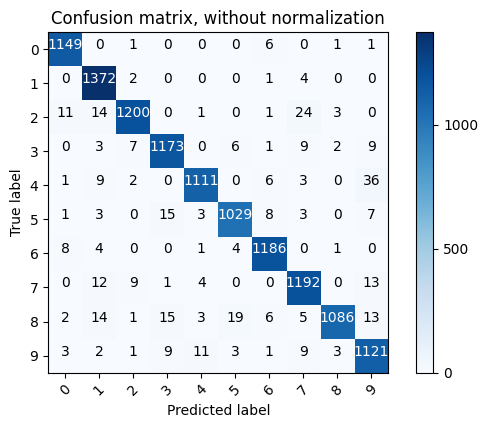

In [18]:
target_names=[i for i in range(10)]
cnf_matrix=metrics.confusion_matrix(y_val, y_pred)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix, without normalization')
plt.show()

Well, we already have our model, how can we save it for further use?
Pickle is the answer. 

In [19]:
import pickle

# Use pickle to save model for next usage.
filename = 'svmModel.pk'
with open('./'+filename, 'wb') as file:
    pickle.dump(svm_classifier, file) 

NameError: name 'svm_classifier' is not defined